<a href="https://colab.research.google.com/github/jackie-Gung/Colab_ESAA/blob/main/2022_12_02_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chap.4 합성곱 신경망(CNN)**
---

### **01. 합성곱 신견망**
---

- **개요**
  - Convolutional Neural Network
  - 데이터가 가진 특징의 패턴을 학습하는 알고리즘
    - 이미지 분류, 객체 탐지, 스타일 전이 등

#### **1-1. 이미지 표현**

- 이미지나 영상은 컴퓨터가 이해할 수 있게 '숫자'로 표현해야 함

#### **1-2. 합성곱 Convolution**

- 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널을 사용해 특성을 추출하는 방법
- 특성맵 feature map: 합성곱 연산을 통해 추출된 이미지
   -> 딥러닝 모델 학습에 사용하면 성능 향상됨

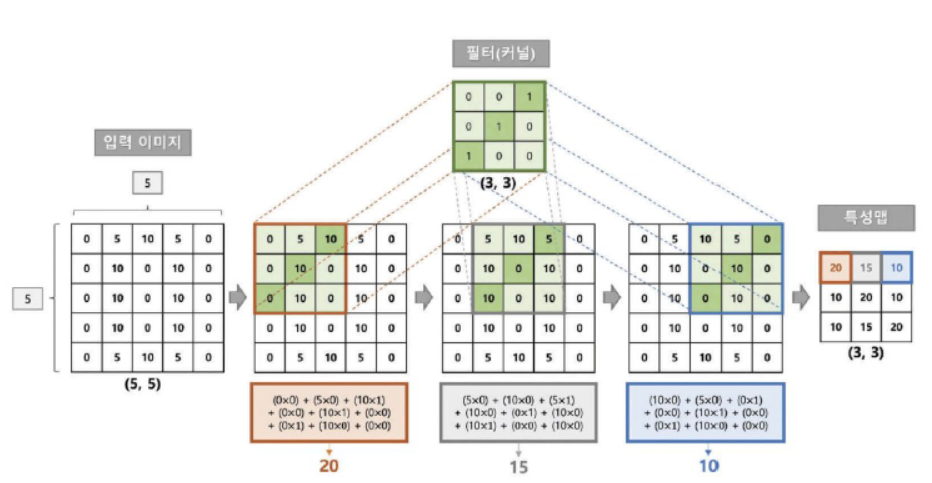

#### **1-3. 채널 channel**

- 입력 이미지를 구성하는 **2차원 배열**의 개수
- 여러 채널을 갖는 경우에 합성곱 연산 과정
  - 채널 개수만큼 커널 생성
  - 채널마다 하나씩 커널을 적용해 합성곱 연산
  - **element wise** 덧셈 연산으로 모두 더하기

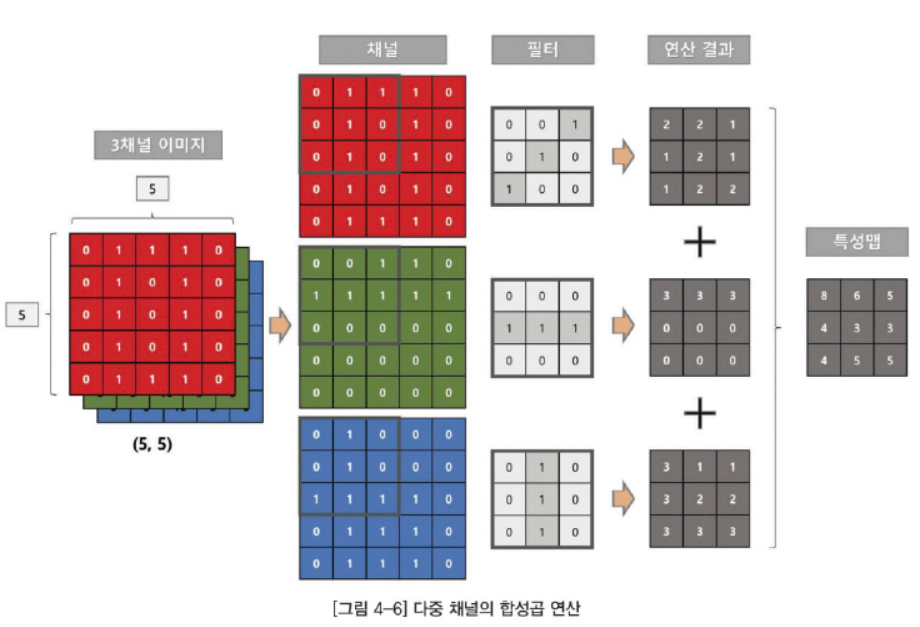

#### **1-4. 스트라이드 stride**

- 커널이 우측으로 이동하면서 합성곱 연산을 수행하는데, 이때 이동 간격을 **'스트라이드'**로 정의함
  - 1로 설정: 우측으로 1픽셀씩 이동
  - 이미 우측 끝이라면 아래 방향으로 1칸 이동함
  - 2로 설정: 2픽셀씩 건너서 특성맵 크기가 반으로 줄어듦

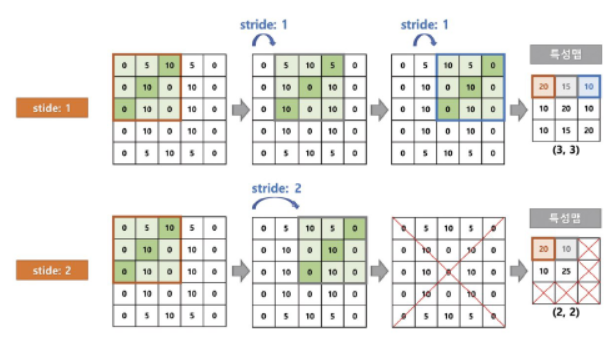

#### **1-5. 패딩 padding**

- 추출된 특성맵의 크기가 입력 이미지 대비 **줄어들지 않도록** 하는 방법
- **zero padding:** 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출
  - 기본값: valid

#### **1-6. 특성맵 사이즈**

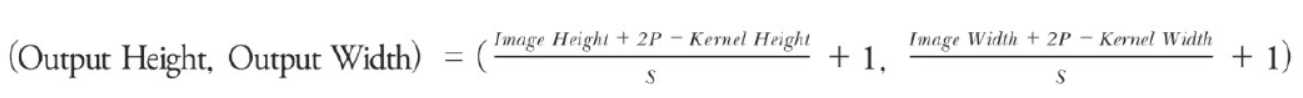

- Image Height/Width: 입력 크기
- Kernel Height/Width: 필터 크기
- S: 스트라이드
- P: 패딩
- Output Height/Width: 출력 크기

#### **1-7. 풀링 pooling**

- 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- **장점: 연산량 감소 및 과대적합 방지**

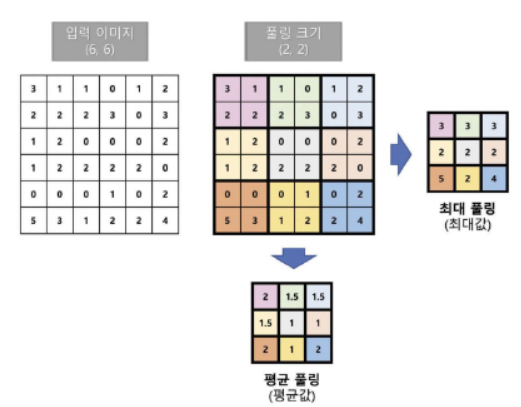

### **02. 간단한 모델 생성**
---

#### **2-1. 데이터 로드 및 전처리**

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


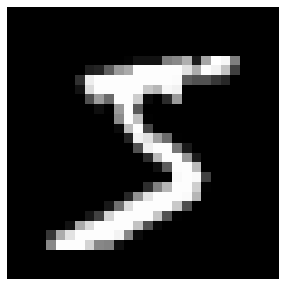

In [5]:
def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx],cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train,0)

In [6]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0.0 1.0
0.0 1.0


In [7]:
# 채널 추가
print(x_train.shape,x_valid.shape)

x_train_in = x_train[...,tf.newaxis]
x_valid_in = x_valid[...,tf.newaxis]

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


#### **2-2. Sequential API 모델 생성 및 학습**

In [8]:
# 샘플 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),name='conv'),
    tf.keras.layers.MaxPooling2D((2,2),name='pool'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax'),

])

In [10]:
# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2127 - accuracy: 0.9394 - val_loss: 0.0837 - val_accuracy: 0.9742
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0786 - accuracy: 0.9775 - val_loss: 0.0632 - val_accuracy: 0.9800
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0603 - accuracy: 0.9821 - val_loss: 0.0605 - val_accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0512 - accuracy: 0.9851 - val_loss: 0.0593 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0583 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0637 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0529 -

In [11]:
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 2s 8ms/step - loss: 0.0592 - accuracy: 0.9825


[0.059190019965171814, 0.9825000166893005]

In [12]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

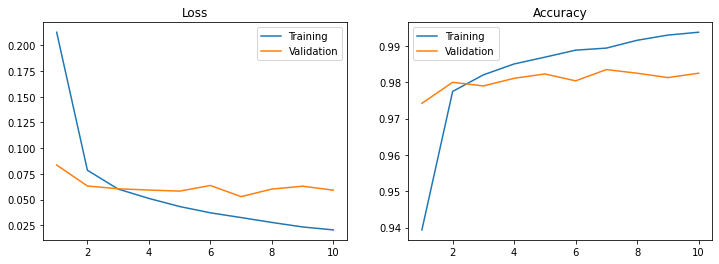

In [13]:
plot_loss_acc(history, 10)

#### **2-3. 모델 구조 파악**

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- None: 배치 크기가 어떤 값이든 가능하다는 의미

In [20]:
# 입력 텐서 형태
print(model.input)
print('\n')
# 출력 텐서 형태
print(model.output)
print('\n')

# 레이어
print(model.layers)
print('\n')

# 첫 번째 레이어 선택
print(model.layers[0])
print('\n')

# 첫 번째 레이어 입력
print(model.layers[0].input)
print('\n')

# 첫 번째 레이어 출력
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv_input'), name='conv_input', description="created by layer 'conv_input'")


KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")


[<keras.layers.convolutional.conv2d.Conv2D object at 0x7f0c2411f130>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f0c2411f5e0>, <keras.layers.reshaping.flatten.Flatten object at 0x7f0c2411f0d0>, <keras.layers.core.dense.Dense object at 0x7f0c24121940>]




KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv_input'), name='conv_input', description="created by layer 'conv_input'")


KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv/Relu:0', description="created by layer 'conv'")


In [21]:
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.24527217,  0.91724306,  0.2083064 ,  0.08322382,
            0.04686292, -0.45513976,  0.01691576,  0.12486059,
           -0.37517357, -0.46924046,  0.3065053 ,  0.44138592,
           -0.01211426,  0.27822083,  0.11896435, -1.0424662 ,
            0.41203424, -0.7087276 ,  0.32225454, -0.91000366,
            0.19226666, -0.8542984 ,  0.17564751,  0.41750187,
            0.09037345, -0.43654844, -0.7456115 ,  0.03492822,
            0.18818036, -0.91586035,  0.4236464 ,  0.04076552]],
 
         [[ 0.30091104, -0.0312614 ,  0.22404577, -0.23816264,
           -0.35721707,  0.12733284,  0.17427856,  0.72763443,
            0.26629642, -0.43553188,  0.46335208,  0.27020016,
           -0.61056226, -0.24957125,  0.38505208, -0.3875261 ,
            0.11449926, -0.8102028 , -0.00465415, -0.86110896,
            0.21782357, -0.7809169 ,  0.31158435, -0.01133858,
            0.3568262 , -0.59974974,  0.13

In [22]:
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.24527217,  0.91724306,  0.2083064 ,  0.08322382,
           0.04686292, -0.45513976,  0.01691576,  0.12486059,
          -0.37517357, -0.46924046,  0.3065053 ,  0.44138592,
          -0.01211426,  0.27822083,  0.11896435, -1.0424662 ,
           0.41203424, -0.7087276 ,  0.32225454, -0.91000366,
           0.19226666, -0.8542984 ,  0.17564751,  0.41750187,
           0.09037345, -0.43654844, -0.7456115 ,  0.03492822,
           0.18818036, -0.91586035,  0.4236464 ,  0.04076552]],

        [[ 0.30091104, -0.0312614 ,  0.22404577, -0.23816264,
          -0.35721707,  0.12733284,  0.17427856,  0.72763443,
           0.26629642, -0.43553188,  0.46335208,  0.27020016,
          -0.61056226, -0.24957125,  0.38505208, -0.3875261 ,
           0.11449926, -0.8102028 , -0.00465415, -0.86110896,
           0.21782357, -0.7809169 ,  0.31158435, -0.01133858,
           0.3568262 , -0.59974974,  0.13676126, -0.078413

In [23]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.1922759 ,  0.10170062, -0.2614346 , -0.1575606 , -0.08205006,
       -0.12796439, -0.13107555, -0.00322087, -0.20525415,  0.15542033,
       -0.0645735 , -0.05664339, -0.01636519, -0.14313383, -0.28342304,
       -0.04418731, -0.28730142, -0.0151276 , -0.17054634, -0.01245175,
       -0.32121676, -0.03636793, -0.23880093, -0.41142285, -0.1353556 ,
       -0.00455813, -0.10373855, -0.2687523 , -0.2608634 , -0.02226556,
       -0.35588196, -0.10861856], dtype=float32)>

In [24]:
model.get_layer('conv')

In [25]:
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

1/1 [==============================] - 0s 88ms/step


2

In [26]:
conv_activation = activations[0]
conv_activation.shape  

(1, 26, 26, 32)

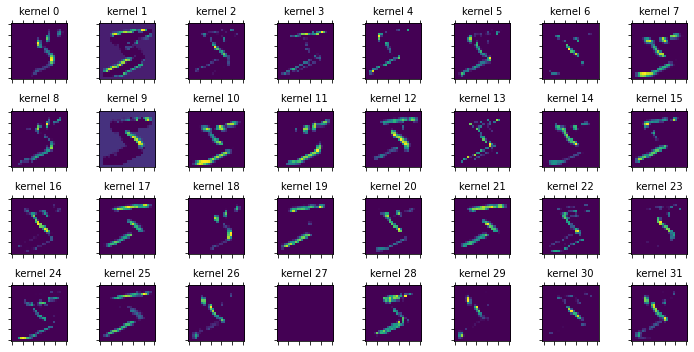

In [27]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [28]:
pooling_activation = activations[1]
print(pooling_activation.shape) 

(1, 13, 13, 32)


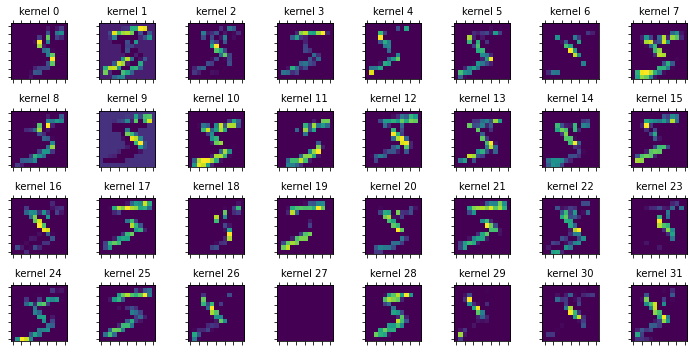

In [29]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

### **03. 복잡한 모델 생성**
---

#### **3-1. 데이터셋 준비**

In [30]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [31]:
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [32]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [33]:
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [34]:
x_train = x_train/255.0
x_valid = x_valid/255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


#### **3-2. Functional API 다중 입출력 레이어 생성**

In [35]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)

concat = tf.keras.layers.Concatenate()([flat, flat_inputs])

outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
     

In [36]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

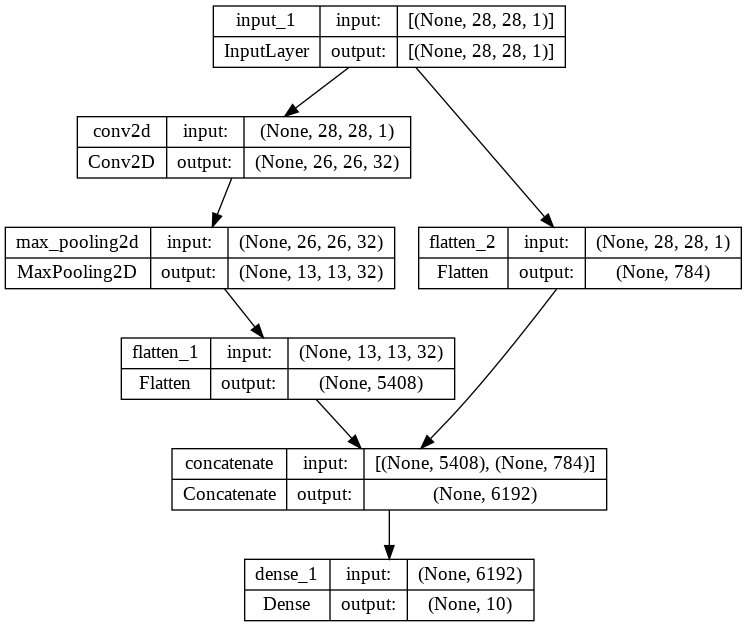

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2044 - accuracy: 0.9431 - val_loss: 0.0926 - val_accuracy: 0.9711
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0787 - accuracy: 0.9774 - val_loss: 0.0616 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0637 - val_accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0488 - accuracy: 0.9853 - val_loss: 0.0532 - val_accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0409 - accuracy: 0.9873 - val_loss: 0.0556 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0565 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0550 -

In [ ]:
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

#### **3-3. 다중 출력 분류 모델**

In [40]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])

digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat) # 0~9까지의 숫자
odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [ ]:
print(model.input)
print(model.output)

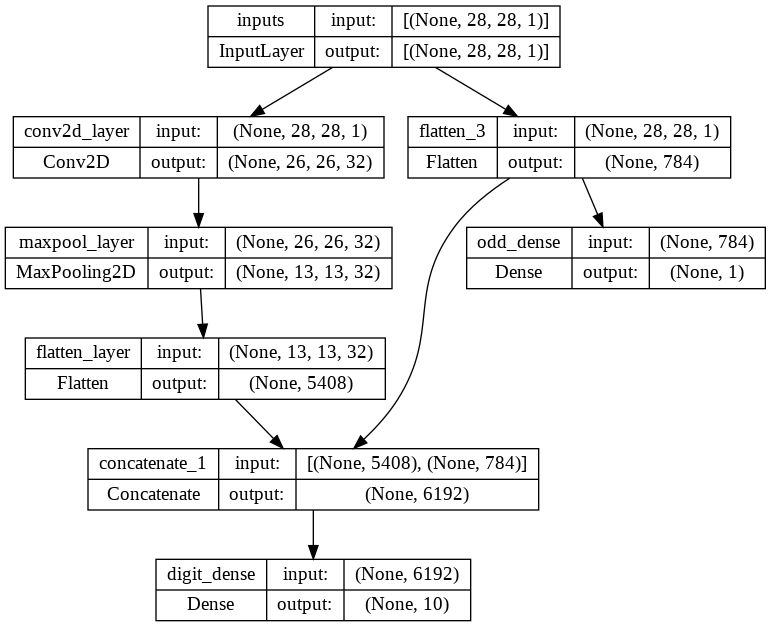

In [44]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [45]:
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

In [46]:
history = model.fit({'inputs': x_train_in},
                    {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3566 - digit_dense_loss: 0.1948 - odd_dense_loss: 0.3235 - digit_dense_accuracy: 0.9445 - odd_dense_accuracy: 0.8642 - val_loss: 0.2219 - val_digit_dense_loss: 0.0836 - val_odd_dense_loss: 0.2766 - val_digit_dense_accuracy: 0.9740 - val_odd_dense_accuracy: 0.8909
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2104 - digit_dense_loss: 0.0749 - odd_dense_loss: 0.2711 - digit_dense_accuracy: 0.9779 - odd_dense_accuracy: 0.8909 - val_loss: 0.1934 - val_digit_dense_loss: 0.0580 - val_odd_dense_loss: 0.2708 - val_digit_dense_accuracy: 0.9815 - val_odd_dense_accuracy: 0.8957
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1891 - digit_dense_loss: 0.0579 - odd_dense_loss: 0.2625 - digit_dense_accuracy: 0.9825 - odd_dense_accuracy: 0.8960 - val_loss: 0.1841 - val_digit_dense_loss: 0.0546 - val_odd_dense_loss: 0.2590 - val_digit_dense_accuracy: 0.9815 -

In [47]:
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 3s 8ms/step - loss: 0.1958 - digit_dense_loss: 0.0668 - odd_dense_loss: 0.2580 - digit_dense_accuracy: 0.9831 - odd_dense_accuracy: 0.8983


[0.19580411911010742,
 0.06681067496538162,
 0.2579869329929352,
 0.9830999970436096,
 0.8982999920845032]

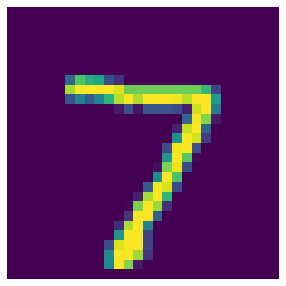

In [48]:
def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [49]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 8ms/step
[1.33554764e-11 5.03727650e-11 5.65917035e-10 3.41299642e-06
 3.98945070e-12 1.72174306e-11 1.73590031e-21 9.99996483e-01
 5.64107649e-10 3.16751669e-09]
[0.99952495]


In [50]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [51]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-51-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

#### **3-4. 전이 학습 Transfer Learning**

In [52]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


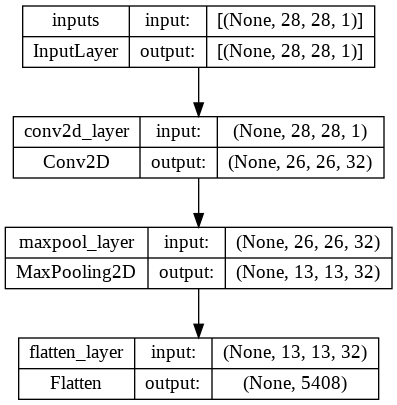

In [53]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [54]:
digit_model = tf.keras.Sequential([base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),])

digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


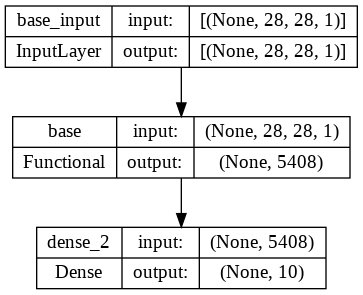

In [55]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')    

In [56]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1281 - accuracy: 0.9650 - val_loss: 0.0668 - val_accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0582 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0515 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.0533 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0510 - val_accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0531 -

In [57]:
base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [58]:
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [59]:
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1169 - accuracy: 0.9687 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0515 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0499 - val_accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0480 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0593 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.0532 - 

In [60]:
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [61]:
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [62]:
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1163 - accuracy: 0.9683 - val_loss: 0.0623 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0484 - accuracy: 0.9858 - val_loss: 0.0506 - val_accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0476 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0514 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0541 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0531 - val_accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0555 - va